# Predicting House Sale Price

In this project, we'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. We will explore how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features.

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
house = pd.read_csv('AmesHousing.tsv', delimiter='\t')

## Create a pipeline of functions

We'll start by creating a pipeline of functions that let us quickly iterate on different models.

1. transform features
2. select features
3. train and test

In [3]:
# return the train data frame
def transform_features(df):
    return df

In [4]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

In [5]:
def train_and_test(df):
    train = df[0:1460]
    test = df[1460:]
    
    # select numeric values
    train_num = train.select_dtypes('number')
    test_num = test.select_dtypes('number')
    
    # drop the target column
    features = train_num.columns.drop('SalePrice')
    
    # test model
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [6]:
# train and test the functions
trans_house = transform_features(house)
filtered_house = select_features(trans_house)
rmse = train_and_test(filtered_house)

rmse

57088.25161263909

## Feature engineering

Before we get started, we need to dive deeper into the dataset, and

* address missing values or data leakage
* transform features into proper format:
    1. numerical to categorical
    2. scaling numerical
    3. fill in missing values
* create new features by combining other features

#### Cope with missing values

In [7]:
# drop the columns with more than 5% of missing values
house.dropna(thresh=house.shape[0]*0.05,how='all',axis=1, inplace=True)

In [8]:
# For the columns containing less than 5% missing values
# fill in the missing values with the most popular value.

null_percentage = house.isnull().sum() / len(house)
less_than_five = house.columns[null_percentage < 0.05]
less_than_five = house.columns[null_percentage != 0]

for col in less_than_five:
    house[col].fillna(house[col].value_counts().idxmax(), inplace=True)
    
house[less_than_five].isnull().sum()

Lot Frontage      0
Alley             0
Mas Vnr Type      0
Mas Vnr Area      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Electrical        0
Bsmt Full Bath    0
Bsmt Half Bath    0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Fence             0
dtype: int64

#### Drop text columns with one or more missing values

In [9]:
text_mv_counts = house.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

house = house.drop(drop_missing_cols_2.index, axis=1)

#### Create new features

In [10]:
years_sold = house['Yr Sold'] - house['Year Built']

# if the value is negative, it's wrong
print(years_sold[years_sold < 0])

years_since_remod = house['Yr Sold'] - house['Year Remod/Add']
print(years_since_remod[years_since_remod < 0])

2180   -1
dtype: int64
1702   -1
2180   -2
2181   -1
dtype: int64


In [11]:
# create new column & drop the rows contain error
house['year_sold'] = house['Yr Sold'] - house['Year Built']
house['years_since_remod'] = house['Yr Sold'] - house['Year Remod/Add']
house.drop([1702, 2180, 2181], axis=0, inplace=True)

# 'Year Built' and 'Year Remod/Add' are no longer needed
house.drop(["Year Built", "Year Remod/Add"], axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,year_sold,years_since_remod
0,1,526301100,20,RL,141.0,31770,Pave,Grvl,IR1,Lvl,...,0,MnPrv,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,...,0,MnPrv,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,...,0,MnPrv,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,93.0,11160,Pave,Grvl,Reg,Lvl,...,0,MnPrv,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,...,0,MnPrv,0,3,2010,WD,Normal,189900,13,12
5,6,527105030,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,...,0,MnPrv,0,6,2010,WD,Normal,195500,12,12
6,7,527127150,120,RL,41.0,4920,Pave,Grvl,Reg,Lvl,...,0,MnPrv,0,4,2010,WD,Normal,213500,9,9
7,8,527145080,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,...,0,MnPrv,0,1,2010,WD,Normal,191500,18,18
8,9,527146030,120,RL,39.0,5389,Pave,Grvl,IR1,Lvl,...,0,MnPrv,0,3,2010,WD,Normal,236500,15,14
9,10,527162130,60,RL,60.0,7500,Pave,Grvl,Reg,Lvl,...,0,MnPrv,0,6,2010,WD,Normal,189000,11,11


#### Drop unnecessary columns

In [12]:
# Drop columns that aren't useful for ML
house = house.drop(["PID", "Order"], axis=1)

# Drop columns that leak info about the final sale
house = house.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

#### Update the transform_features() function

In [13]:
def transform_features(df):
    
    # drop the columns with more than 5% of missing values
    df.dropna(thresh=df.shape[0]*0.05,how='all',axis=1, inplace=True)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    # fill in the remain missing values with the most frequent value of that column
    null_percentage = df.isnull().sum() / len(df)
    less_than_five = df.columns[null_percentage < 0.05]
    less_than_five = df.columns[null_percentage != 0]

    for col in less_than_five:
        df[col].fillna(df[col].value_counts().idxmax(), inplace=True)
    
    # create new column & drop the rows contain error
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df.drop([1702, 2180, 2181], axis=0, inplace=True)
    
    # Drop unnecessary columns 
    df.drop(['PID', 'Order','Mo Sold', 'Sale Condition', 'Sale Type', 'Year Built', 'Year Remod/Add'], axis=1, inplace=True)

    return df

In [14]:
house = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_house = transform_features(house)
filtered_house = select_features(transform_house)
rmse = train_and_test(filtered_house)

rmse

55275.36731241307

## Feature selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

#### Numerical features

In [15]:
# select numerical columns
house_num = transform_house.select_dtypes('number')

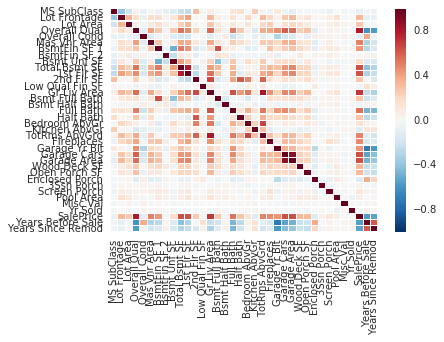

In [16]:
sns.heatmap(house_num.corr(), linewidths=0.1)
sns.set(font_scale=0.8)

In [17]:
abs_corr_coeffs = house_num.corr()['SalePrice'].abs().sort_values()
print(abs_corr_coeffs)

BsmtFin SF 2         0.006127
Misc Val             0.019273
Yr Sold              0.030358
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Are

In [18]:
# keep the columns with a correlation coefficient larger than 0.4
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [19]:
low_corr = abs_corr_coeffs[abs_corr_coeffs < 0.4].index
transform_house.drop(low_corr, axis=1, inplace=True)
transform_house.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,7,Typ,2,1960.0,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,5,Typ,0,1961.0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,6,Typ,0,1958.0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,8,Typ,2,1968.0,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,6,Typ,1,1997.0,2.0,482.0,Y,189900,13,12


#### Categorical features

For this step, we need to determine:

* which columns are currently numerical but need to be encoded as categorical instead?
* if a categorical column has hundreds of unique values (or categories), should we keep it? 

In [20]:
# the list that meant to be categorical
categorical = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                "Misc Feature", "Sale Type", "Sale Condition"]

# find out colums that is categorical but numerical 
cat_but_num =[]
for col in categorical:
    if col in transform_house.columns:
        cat_but_num.append(col)
        
# count how many unique values these columns has
unique_values = transform_house[cat_but_num].apply(lambda col: len(col.value_counts())).sort_values()

# remove columns with more than 10 unique values
many_unique = unique_values[unique_values > 10].index
transform_house.drop(many_unique, axis=1, inplace=True)

transform_house.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,...,TotRms AbvGrd,Functional,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,7,Typ,2,1960.0,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,...,5,Typ,0,1961.0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,6,Typ,0,1958.0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,8,Typ,2,1968.0,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,6,Typ,1,1997.0,2.0,482.0,Y,189900,13,12


In [21]:
# Select the remaining text columns and convert to categorical
text_cols = transform_house.select_dtypes(include=['object'])
for col in text_cols:
    transform_house[col] = transform_house[col].astype('category')

# create dummy columns and add back to the data frame
dummies = pd.get_dummies(transform_house.select_dtypes(include=['category']))
transform_house = pd.concat([transform_house, dummies]).drop(text_cols, axis=1)

transform_house.head()

,1st Flr SF,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,BsmtFin SF 1,Central Air_N,Central Air_Y,Condition 1_Artery,...,SalePrice,Street_Grvl,Street_Pave,TotRms AbvGrd,Total Bsmt SF,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Years Before Sale,Years Since Remod
0,1656.0,NaN,NaN,NaN,NaN,NaN,639.0,NaN,NaN,NaN,...,215000.0,NaN,NaN,7.0,1080.0,NaN,NaN,NaN,50.0,50.0
1,896.0,NaN,NaN,NaN,NaN,NaN,468.0,NaN,NaN,NaN,...,105000.0,NaN,NaN,5.0,882.0,NaN,NaN,NaN,49.0,49.0
2,1329.0,NaN,NaN,NaN,NaN,NaN,923.0,NaN,NaN,NaN,...,172000.0,NaN,NaN,6.0,1329.0,NaN,NaN,NaN,52.0,52.0
3,2110.0,NaN,NaN,NaN,NaN,NaN,1065.0,NaN,NaN,NaN,...,244000.0,NaN,NaN,8.0,2110.0,NaN,NaN,NaN,42.0,42.0
4,928.0,NaN,NaN,NaN,NaN,NaN,791.0,NaN,NaN,NaN,...,189900.0,NaN,NaN,6.0,928.0,NaN,NaN,NaN,13.0,12.0


#### Update the logic for the select_features() function

In [22]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    
    # look at numerical columns first then categorical
    # select numerical columns
    df_num = df.select_dtypes('number')
    
    # keep the columns 
    # with a correlation coefficient larger than 0.4
    abs_corr_coeffs = df_num.corr()['SalePrice'].abs().sort_values()
    low_corr = abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index
    df.drop(low_corr, axis=1, inplace=True)
    
    # the list that meant to be categorical
    categorical = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                "Misc Feature", "Sale Type", "Sale Condition"]

    # find out colums that is categorical but numerical 
    cat_but_num =[]
    for col in categorical:
        if col in df.columns:
            cat_but_num.append(col)
        
    # count how many unique values these columns has
    unique_values = df[cat_but_num].apply(lambda col: len(col.value_counts())).sort_values()

    # remove columns with more than 10 unique values
    many_unique = unique_values[unique_values > uniq_threshold].index
    df.drop(many_unique, axis=1, inplace=True)
    
    # Select the remaining text columns and convert to categorical
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')

    # create dummy columns and add back to the data frame
    dummies = pd.get_dummies(df.select_dtypes(include=['category']))
    df = pd.concat([df, dummies], axis=1).drop(text_cols, axis=1)
    
    return df

#### Update the train_and_test function()

In [23]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [24]:
def train_and_test(df, k=0):
    df_num = df.select_dtypes('number')
    features = df_num.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df_num[:1460]
        test = df_num[1460:]
    
        # test model
        lr.fit(train[features], train['SalePrice'])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test['SalePrice'],predictions)
        rmse = np.sqrt(mse)
    
        return rmse
    
    if k == 1:
        # shuffle the ordering
        shuffled_df = df.sample(frac=1)
        fold_one = shuffled_df[:1460]
        fold_two = shuffled_df[1460:]
    
        # train on fold_one and test on fold_two
        lr.fit(fold_one[features], fold_one['SalePrice'])
        predictions = lr.predict(fold_two[features])
        mse_1 = mean_squared_error(fold_two['SalePrice'],predictions)
        rmse_1 = np.sqrt(mse_1)
        print(rmse_1)
        
        # train on fold_two and test on fold_one
        lr.fit(fold_two[features], fold_two['SalePrice'])
        predictions = lr.predict(fold_one[features])
        mse_2 = mean_squared_error(fold_one['SalePrice'],predictions)
        rmse_2 = np.sqrt(mse_2)
        print(rmse_2)
        
        return (rmse_1 + rmse_2) / 2
    
    else:
        # When k is greater than 0
        # implement k-fold cross validation using k folds
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
        print(rmse_values)
            
        return np.mean(rmse_values)

In [25]:
house = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_house = transform_features(house)
filtered_house = select_features(transform_house)
rmse = train_and_test(filtered_house, k=4)

rmse

[27104.953241272, 26379.88894386116, 35648.69938876068, 27501.256426906617]


29158.699500200113